# Tutorial

### Instructions

In this tutorial, you will be creating a classifcation model. The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange. Apply what you have learnt and come up with the optimal model to predict if a company goes bankrupt or not. 

Bonus: Determine what are the key features that influence your model. 

 PS: If you find a technique/method that you believe was not shared in class but useful; you can and should use it. No points will be deducted for trying! Do not delete your trial scripts, these will be important for you to understand where you improved from your previous attempts.



In [2]:
from scipy import optimize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_curve, auc, confusion_matrix, f1_score, ConfusionMatrixDisplay, classification_report

In [3]:
data= pd.read_csv('datasets/data.csv')

In [4]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [5]:
data.count()

Bankrupt?                                                   6819
 ROA(C) before interest and depreciation before interest    6819
 ROA(A) before interest and % after tax                     6819
 ROA(B) before interest and depreciation after tax          6819
 Operating Gross Margin                                     6819
                                                            ... 
 Liability to Equity                                        6819
 Degree of Financial Leverage (DFL)                         6819
 Interest Coverage Ratio (Interest expense to EBIT)         6819
 Net Income Flag                                            6819
 Equity to Liability                                        6819
Length: 96, dtype: int64

In [6]:

def reg_data(a, b, n, s):
   rtn_x, rtn_y = [], []
   for i in range(n):
       x = np.random.normal(0.0, 0.5)
       y = a * x + b + np.random.normal(0.0, s)
       rtn_x.append(x) 
       rtn_y.append(y) 
   return np.array(rtn_x).reshape(-1,1), np.array(rtn_y)


x, y = reg_data(a=0.5, b=0.3, n=1000, s=0.2)

X = np.hstack([np.ones([x.shape[0], 1]), x]) 
REG_CONST = 0.01   


def ols_loss(W, args):
    e = np.dot(W, X.T) - y
    mse = np.mean(np.square(e))  
    loss = mse + REG_CONST * np.sum(np.square(W)) 
    
   
    if args[0] == True:
        trace_W.append([W, loss])
    return loss


trace_W = []
result = optimize.minimize(ols_loss, [-4., 4], args=[True]) 
print(result) 

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.04301444299229319
        x: [ 3.049e-01  4.841e-01]
      nit: 7
      jac: [-4.005e-08 -1.159e-07]
 hess_inv: [[ 4.958e-01 -3.935e-02]
            [-3.935e-02  1.815e+00]]
     nfev: 24
     njev: 8


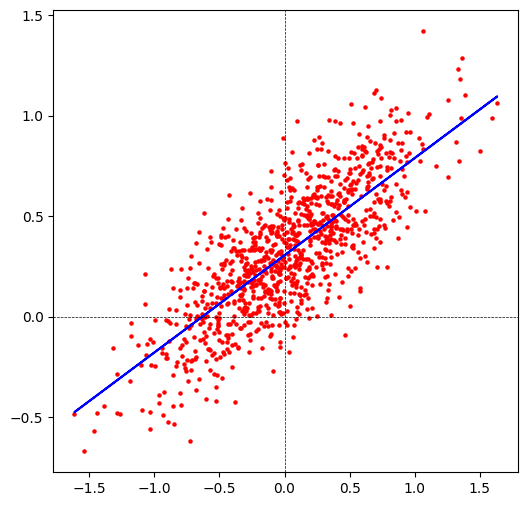

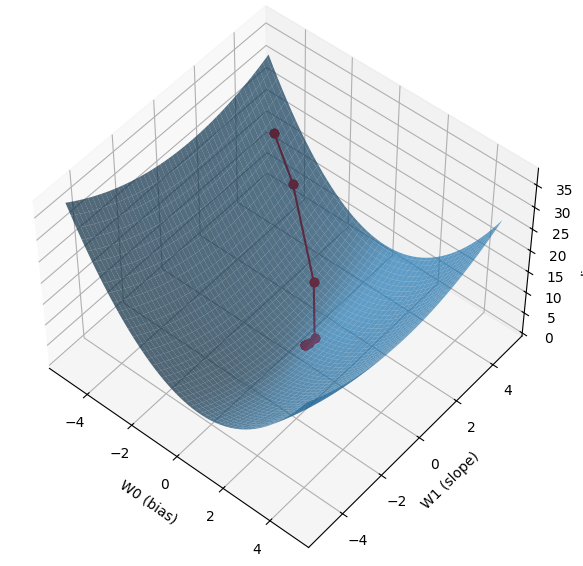


R2 score = 0.6260


In [7]:
y_hat = np.dot(result.x, X.T) 
plt.figure(figsize=(6, 6)) 
plt.scatter(x, y, s=5, c='r')
plt.plot(x, y_hat, c='blue')
plt.axvline(x=0, ls='--', lw=0.5, c='black')
plt.axhline(y=0, ls='--', lw=0.5, c='black')
plt.show()

m = 5
t = 0.1
w0, w1 = np.meshgrid(np.arange(-m, m, t), np.arange(-m, m, t))
zs = np.array([ols_loss([a,b], [False]) for [a, b] in zip(np.ravel(w0), np.ravel(w1))])
z = zs.reshape(w0.shape)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')


ax.plot_surface(w0, w1, z, alpha=0.7)

b = np.array([tw0 for [tw0, tw1], td in trace_W])
w = np.array([tw1 for [tw0, tw1], td in trace_W])
d = np.array([td for [tw0, tw1], td in trace_W])
ax.plot(b, w, d, marker='o', color="r")

ax.set_xlabel('W0 (bias)')
ax.set_ylabel('W1 (slope)')
ax.set_zlabel('distance')
ax.azim = -50
ax.elev = 50
plt.show()


sst = np.sum(np.square(y - np.mean(y)))  
sse = np.sum(np.square(y - y_hat))       
r2 = 1 - sse / sst
print('\nR2 score = {:.4f}'.format(r2))

In [8]:
y = data['Bankrupt?']
x = data.drop(columns=['Bankrupt?'])

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.transform(x_test)

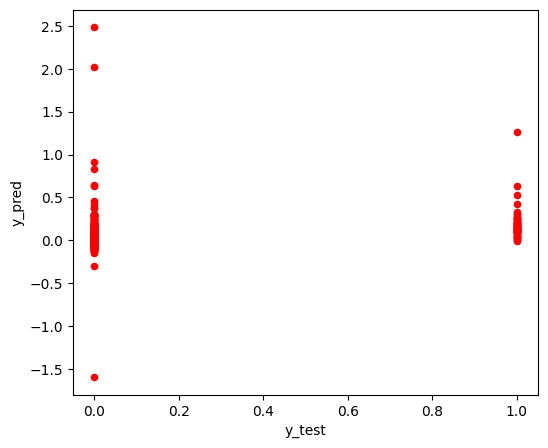


R2 (Linear Regression) = -0.108
R2 (Ridge) = 0.013
R2 (Lasso) = 0.094


In [10]:
model = LinearRegression()
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)


plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, s=20, c='r')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()


r2 = model.score(x_test_scaled, y_test)
print('\nR2 (Linear Regression) = {:.3f}'.format(r2))


model = Ridge(alpha=0.01)
model.fit(x_train_scaled, y_train)
r2 = model.score(x_test_scaled, y_test)
print('R2 (Ridge) = {:.3f}'.format(r2))


model = Lasso(alpha=0.01)
model.fit(x_train_scaled, y_train)
r2 = model.score(x_test_scaled, y_test)
print('R2 (Lasso) = {:.3f}'.format(r2))

DecisionTreeClassifier: accuracy = 0.964


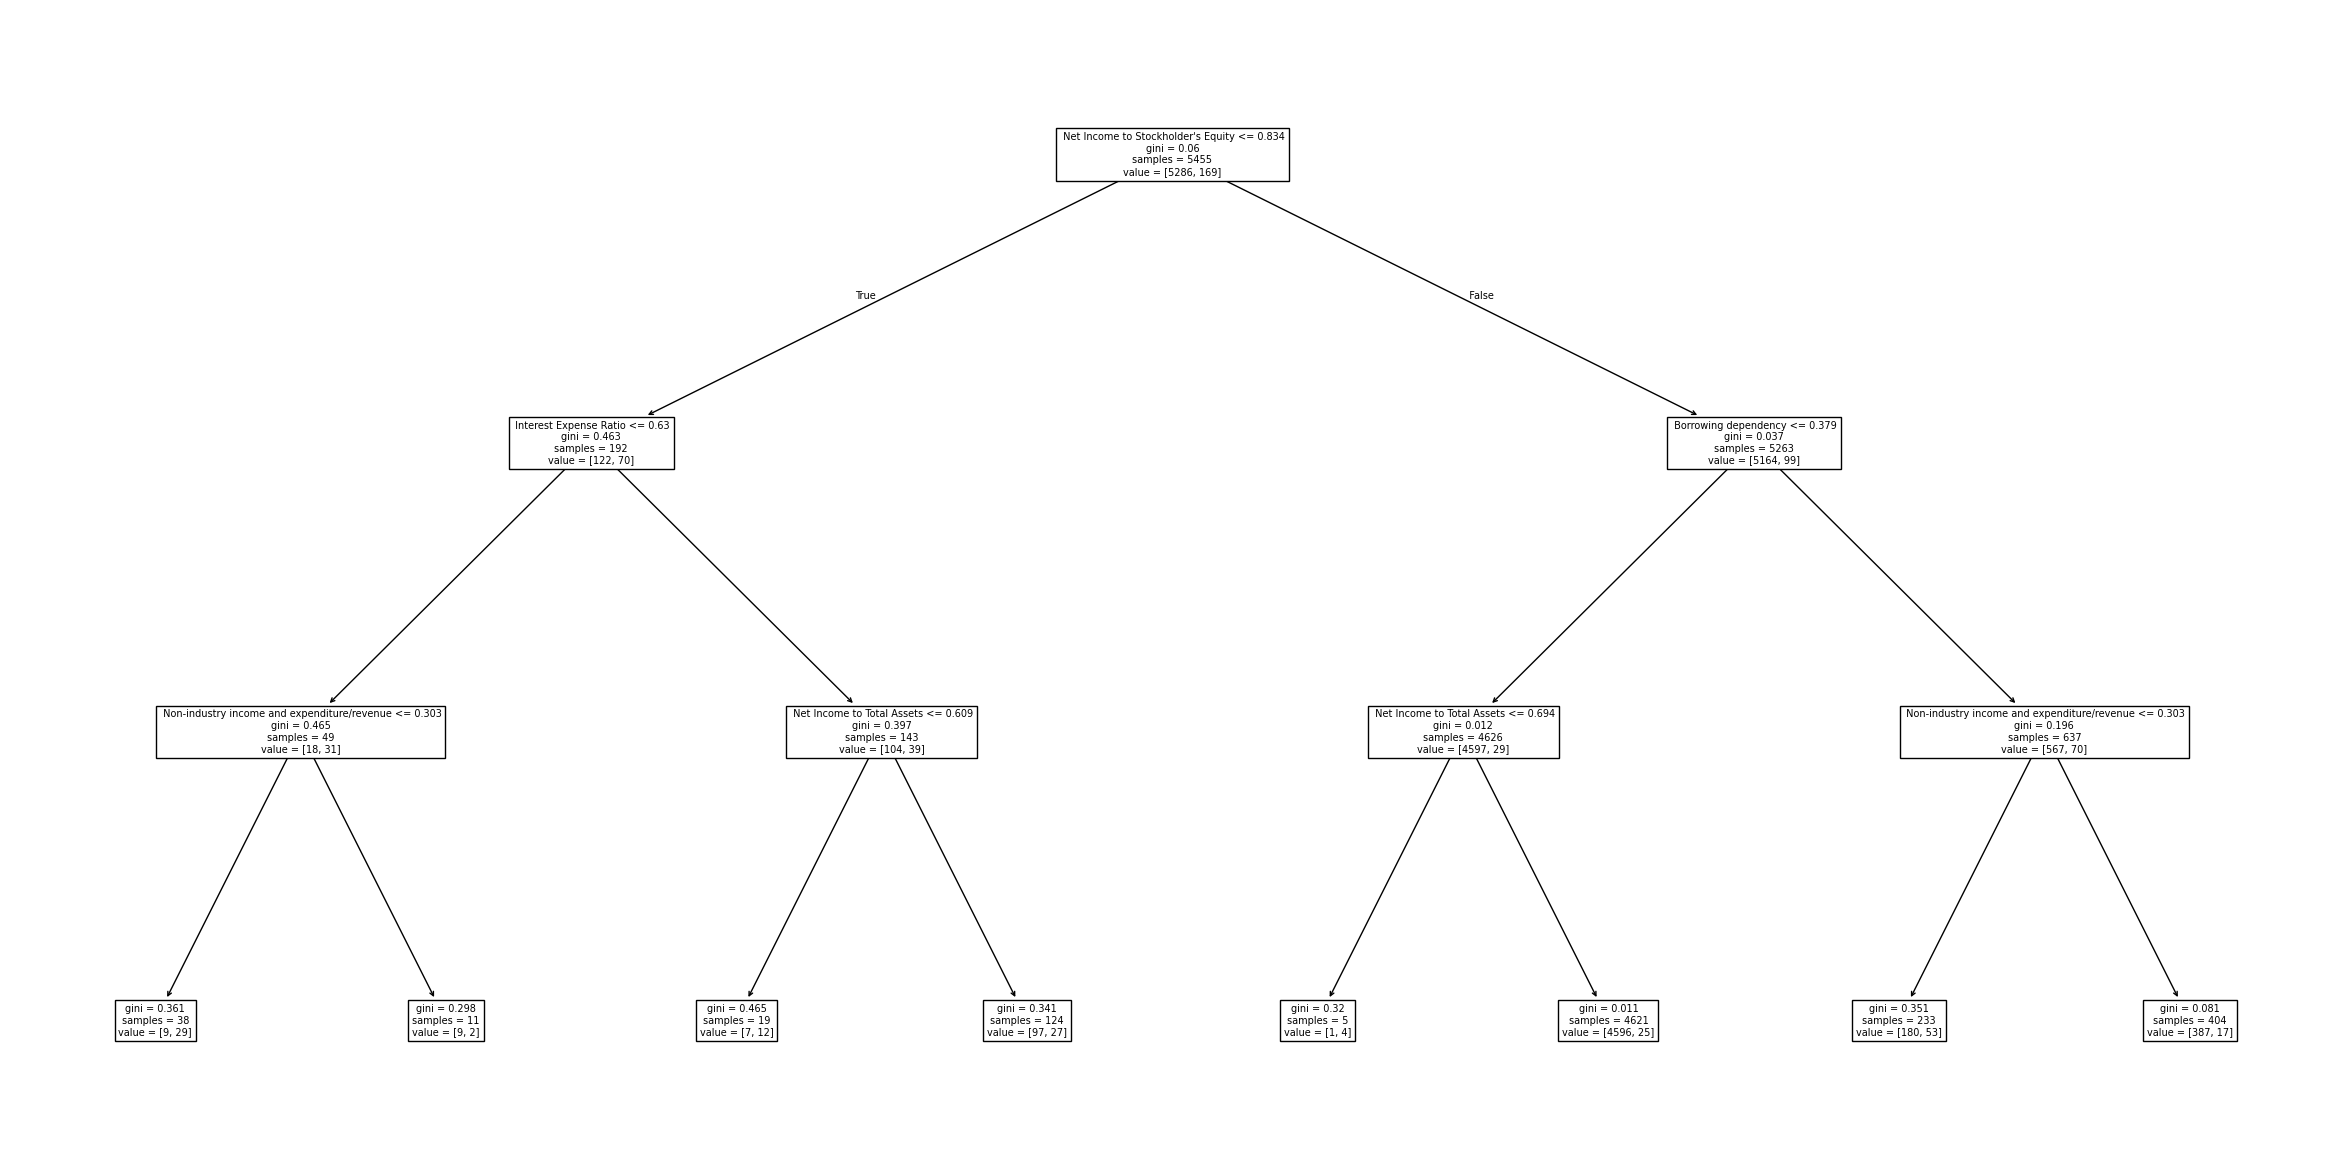

In [11]:
y = data['Bankrupt?']
x = data.drop('Bankrupt?', axis=1)
depth = 3 


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

sk_model = DecisionTreeClassifier(max_depth=depth, 
                                  random_state=1)
sk_model.fit(x_train, y_train)
sk_pred = sk_model.predict(x_test)
acc = (y_test == sk_pred).mean()
print('DecisionTreeClassifier: accuracy = {:.3f}'.format(acc))


feature_names = x.columns.tolist()
plt.figure(figsize=(30, 15))
tree.plot_tree(sk_model,
               feature_names=feature_names)
plt.show()

Depth = 1, train_acc = 0.9713, eval_acc = 0.9629
Depth = 2, train_acc = 0.9740, eval_acc = 0.9648
Depth = 3, train_acc = 0.9753, eval_acc = 0.9638
Depth = 4, train_acc = 0.9784, eval_acc = 0.9619
Depth = 5, train_acc = 0.9832, eval_acc = 0.9599
Depth = 6, train_acc = 0.9870, eval_acc = 0.9638
Depth = 7, train_acc = 0.9893, eval_acc = 0.9638
Depth = 8, train_acc = 0.9931, eval_acc = 0.9599


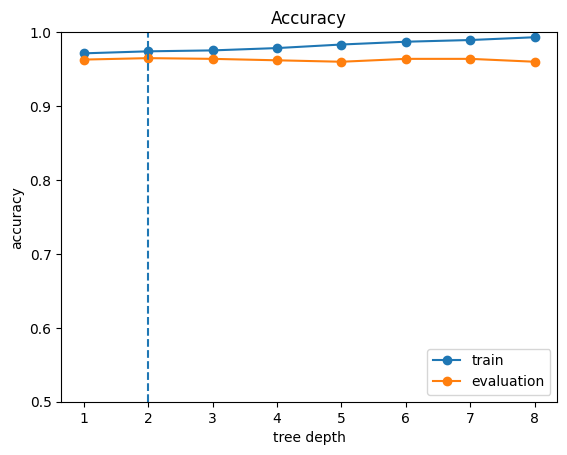

In [12]:
y = data['Bankrupt?']
x = data.drop('Bankrupt?', axis=1)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

x_test, x_eval, y_test, y_eval = train_test_split(x_test, y_test, test_size = 0.5)


train_acc = []
eval_acc = []
max_depth = 8
for d in range(1, max_depth+1):
    model = DecisionTreeClassifier(max_depth=d)
    model.fit(x_train, y_train)
    
 
    y_pred = model.predict(x_train)
    train_acc.append((y_pred == y_train).mean())


    y_pred = model.predict(x_eval)
    eval_acc.append((y_pred == y_eval).mean())
    print('Depth = {}, train_acc = {:.4f}, eval_acc = {:.4f}'\
          .format(d, train_acc[-1], eval_acc[-1]))


opt_depth = np.argmax(eval_acc) + 1


plt.plot(train_acc, marker='o', label='train')
plt.plot(eval_acc, marker='o', label='evaluation')
plt.legend()
plt.title('Accuracy')
plt.xlabel('tree depth')
plt.ylabel('accuracy')
plt.xticks(np.arange(max_depth), np.arange(1, max_depth+1))
plt.axvline(x=opt_depth-1, ls='--')
plt.ylim(0.5, 1.0)
plt.show()

In [13]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
# regularization constant (strength)
REG_CONST = 0.01

# Create a model and fit it to the training data.
# C := inverse of regularization strength
model = LogisticRegression(penalty='l2', C=1./REG_CONST, max_iter=300)
model.fit(x_train_scaled, y_train)

# Predict the classes of test data and measure the accuracy of test data
y_pred = model.predict(x_test_scaled)
acc = (y_pred == y_test).mean()
print('\nAccuracy of test data = {:.3f}'.format(acc))


Accuracy of test data = 0.954


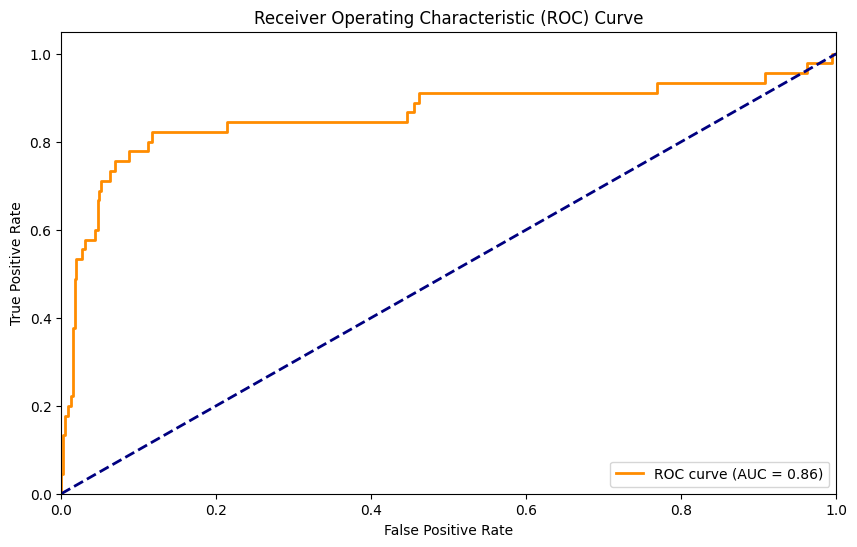

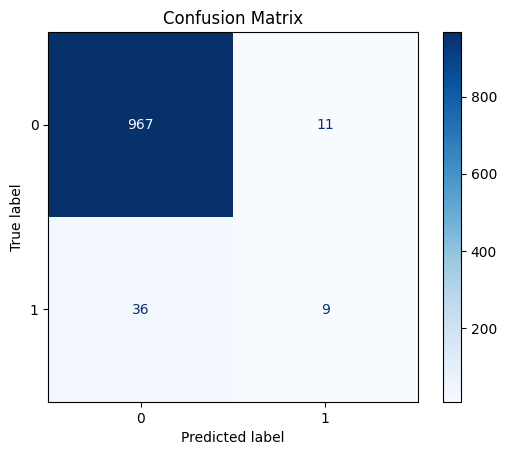

AUC Score: 0.861
F1 Score: 0.277

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       978
           1       0.45      0.20      0.28        45

    accuracy                           0.95      1023
   macro avg       0.71      0.59      0.63      1023
weighted avg       0.94      0.95      0.95      1023



In [14]:
y_pred_proba = model.predict_proba(x_test_scaled)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f'AUC Score: {roc_auc:.3f}')
print(f'F1 Score: {f1:.3f}')

# Print Classification Report 
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Optimal depth = 2, test_acc = 0.9580


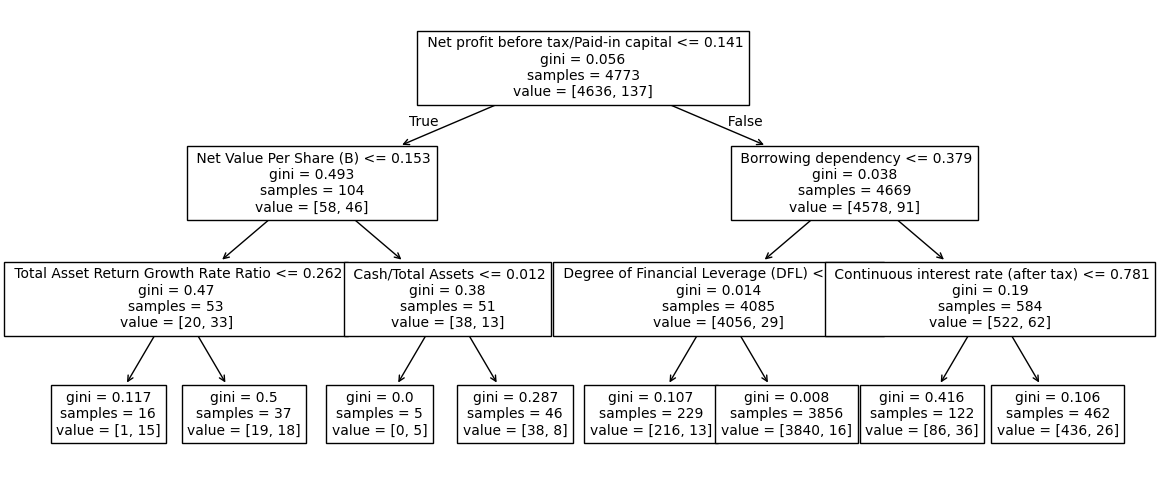

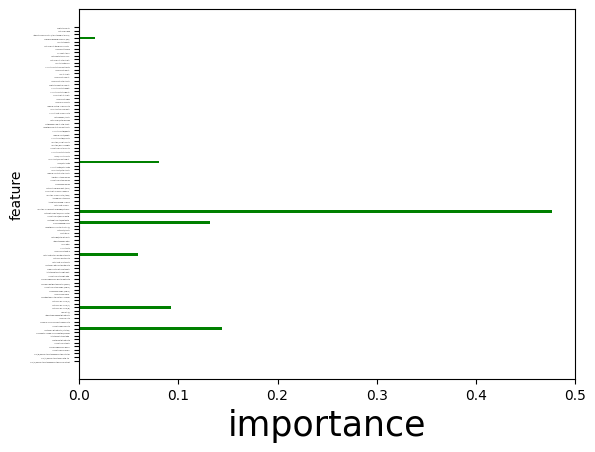

feature importance = [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.144 0.    0.
 0.    0.    0.    0.092 0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.06  0.    0.    0.    0.    0.
 0.    0.    0.    0.131 0.    0.    0.477 0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.081 0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.016 0.    0.    0.   ]


In [15]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train, y_train)


y_pred = model.predict(x_test)
test_acc = (y_pred == y_test).mean()
print('Optimal depth = {}, test_acc = {:.4f}'.format(opt_depth, test_acc))
        

feat_names = x.columns.tolist()
plt.figure(figsize=(14,6))
tree.plot_tree(model, feature_names = feat_names, fontsize=10)
plt.show()


feature_importance = model.feature_importances_
n_feature = x_train.shape[1]
idx = np.arange(n_feature)

plt.barh(idx, feature_importance, align='center', color='green')
plt.yticks(idx, feat_names, size=1)
plt.xlabel('importance', size=25)
plt.ylabel('feature', size=10)
plt.show()

print('feature importance = {}'.format(feature_importance.round(3)))